<h2> Project Notebook for the course DATA102 - Data Mining and Statistics </h2>

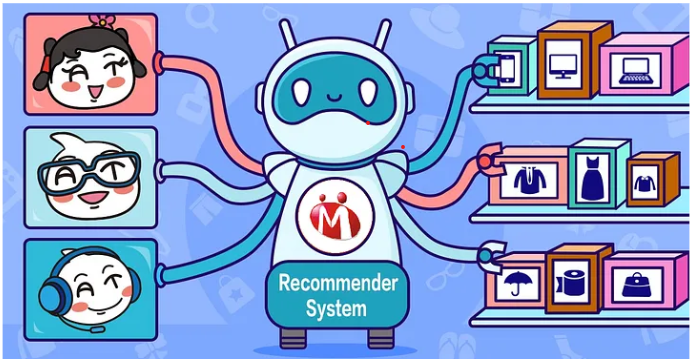

By: Endozo, Angelo Gaillard C., Hernandez Miro, Sonoy, Caleb James G.

<h2>1. Problem Statement</h2>

In 2018, brick-and-mortar sales growth have been stagnating, which only rose 3.4% year-on-year in 2018 compared to e-commerce surging 16.4% to $123.7 billion. Department store sales have plummeted by 36% since 2001 (Business Insider, 2018), signaling a dire situation, especially for mall-based retailers. The challenge now is to devise effective strategies to navigate this shift, whether through enhancing online presence, creating unique in-store experiences, or embracing innovation to stay competitive amidst the relentless growth of e-commerce. Adapting to innovation would require traditional stores to shell out expenses to fund and build their online stores. However, building online stores and hosting them online is not the absolute savior for their business. This is why some online stores have their sales plateauing and decreasing after making their online store, becaue they do not invest further in creating their own recommender systems. 

The quantity of explicit ratings or reviews are far more less than implicit preferences in a lot of popular ecommerce applications, like Hulu, Netflix, and Amazon. Pan (2018) suggests that if one must have to map the whole interest behavior of a customer to a movie or product, they must base on implicit behavior, such as watching, listening or purchasing behavior. This behvaiors have most of the bulk of data and are enough to map out the behaviors of different customers, hence the main recommender system of this project is an item-based collaborative filtering recommender system. Compared to other content-based recommender systems that bases recommendations based on the characteristics of the product (Big Ecommerce, n.d.), the project has incorporated a content-based recommender system that is based on the categories of customer action, product, and price range to address the cold start problem where there is not enough data on user and item similarity. 

With these prevalent problems, this project aims to shed some light on the marvels of content-based and collaborative based recommender systems for new online or ecommerce stores. Not only will this project address the cold start problem of every new online store, it will also show how unseen or unpurchased products will be recommended to users to increase the sales and customer retention in multicategory stores.

<h2>2. Data Collection</h2>

<p>The dataset contains information on the event behavior of e-commerce users and the kinds of products they are interacting with. The data was taken from Kaggle but originally came from the REES46 Maarketing Platform.</p>
 
 <p>Press <a href="https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/data?fbclid=IwAR2oaEwPdXV6H1QR8gKuFEsHG2zFPlGMDTeGguPENNUK595SkBi-47QXCZU">here</a> for the link to the Kaggle page.</p>

<p>The dataset came from the REES46 Marketing Platform.</p>

<h2>3. Exploratory Data Analysis</h2>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Prevent showing scientific notation
plt.style.use("ggplot")

<h3>Data Inspection</h3>
<ul>
    <li>As can be seen below, some columns of the dataframe can be typecasted to another datatype.</li>
    <li>It can also be seen that some columns have a lot of unique values.</li>
    <li>The dataset also has rows with null values.</li>
    <li>The dataset has duplicate rows.</li>
</ul>

In [4]:
df = pd.read_csv('2020-Apr-ecommerce-products.csv')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc
...,...,...,...,...,...,...,...,...,...
66589263,2020-04-30 23:59:59 UTC,view,1003319,2232732093077520756,construction.tools.light,apple,900.90,648021639,b30b4657-011a-42bb-a57b-300b0030ef50
66589264,2020-04-30 23:59:59 UTC,view,1005141,2232732093077520756,construction.tools.light,apple,1599.78,649775363,a1f49d5b-714f-4e38-b66a-d1679d4d2a1c
66589265,2020-04-30 23:59:59 UTC,view,100205454,2232732085041234105,apparel.shirt,defacto,12.84,639250275,8b9ae17d-c0c1-4bad-aa20-9b541c8be405
66589266,2020-04-30 23:59:59 UTC,view,12200824,2053013553325015316,appliances.kitchen.toster,cube,1956.03,522762529,d272f36d-f20b-4540-ac35-9b779acc4dd7


In [5]:
# Some columns in the dataset can be converted into another datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66589268 entries, 0 to 66589267
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [6]:
#Check the number of unique entries for each column
print("Here is the count of unique entries for each column.")
for column in df.columns:
    nunique_value = df[column].nunique()
    print(f"{column}: {nunique_value}")

Here is the count of unique entries for each column.
event_time: 2564826
event_type: 3
product_id: 263503
category_id: 1201
category_code: 141
brand: 4885
price: 54692
user_id: 4509623
user_session: 11652261


In [7]:
# Get the number of null values per column
print("Here is the count of null values for each column")
df.isna().sum(axis=0)

Here is the count of null values for each column


event_time             0
event_type             0
product_id             0
category_id            0
category_code    6755873
brand            8992487
price                  0
user_id                0
user_session         109
dtype: int64

In [8]:
# Check for duplicates
duplicates = df.duplicated(keep=False)
df[duplicates]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1900,2020-04-01 00:14:06 UTC,cart,1004174,2232732093077520756,construction.tools.light,tp-link,89.83,568606257,dd537eff-458e-4195-b442-ab7d1dbe5567
1901,2020-04-01 00:14:06 UTC,cart,1004174,2232732093077520756,construction.tools.light,tp-link,89.83,568606257,dd537eff-458e-4195-b442-ab7d1dbe5567
1902,2020-04-01 00:14:06 UTC,cart,1004174,2232732093077520756,construction.tools.light,tp-link,89.83,568606257,dd537eff-458e-4195-b442-ab7d1dbe5567
2652,2020-04-01 00:19:22 UTC,cart,5500323,2232732093941547400,furniture.bedroom.blanket,philips,71.02,518990464,d93dc6df-57ba-4503-ae6c-60240c5fef49
2653,2020-04-01 00:19:22 UTC,cart,5500323,2232732093941547400,furniture.bedroom.blanket,philips,71.02,518990464,d93dc6df-57ba-4503-ae6c-60240c5fef49
...,...,...,...,...,...,...,...,...,...
66584848,2020-04-30 23:52:11 UTC,cart,46800031,2053013556755956197,appliances.kitchen.refrigerators,coolfort,100.36,620756730,025faed7-8958-43af-aedb-0337410a607a
66585866,2020-04-30 23:53:56 UTC,view,1002995,2232732093077520756,construction.tools.light,apple,411.83,518315970,c8425504-037f-4d09-8303-767fafcb8e82
66585869,2020-04-30 23:53:56 UTC,view,1002995,2232732093077520756,construction.tools.light,apple,411.83,518315970,c8425504-037f-4d09-8303-767fafcb8e82
66587585,2020-04-30 23:56:56 UTC,cart,1005132,2232732093077520756,construction.tools.light,apple,1305.54,535481065,944ce180-d024-4e17-a5ec-7e7db0ae0c01


In [9]:
df.describe()

,product_id,category_id,price,user_id
count,66589268.00,66589268.00,66589268.00,66589268.00
mean,35190201.41,2180717230957448960.00,273.33,582774378.74
std,41935772.02,81232099685124304.00,356.08,48884439.81
min,1000365.00,2053013551857008896.00,0.00,27396220.00
25%,2602135.00,2053013562778977024.00,51.46,533506193.00
50%,12200908.00,2232732092767142144.00,148.91,587620819.00
75%,100022400.00,2232732098446230016.00,342.35,633779462.00
max,100234250.00,2298840883472105984.00,2574.07,649775983.00


<h3>Data Preprocessing</h3>
<p>Preliminary data wrangling is done here. Further preprocessing will be done for the recommender system.</p>

<h4>Data Cleaning</h4>
<p>A summary of actions done:</p>
<ul>
    <li>Convert datatypes for efficiency purposes</li>
    <li>Drop duplicate rows.</li>
    <li>Drop rows with a null value in the category_code column.</li>
    <li>Drop rows with zero values in the price column.</li>
</ul>

In [10]:
# typecast columns to other datatypes
df ["event_time"] = pd.to_datetime(df["event_time"], format="%Y-%m-%d %H:%M:%S %Z", errors="raise")
df["event_type"] = df["event_type"].astype("category")
df["product_id"] = df["product_id"].astype("int32")
df["category_code"] = df["category_code"].astype("category")
df["brand"] = df["brand"].astype("category")
df["user_id"] = df["user_id"].astype("int32")
df["user_session"] = df["user_session"].astype("string")
df.dtypes

event_time       datetime64[ns, UTC]
event_type                  category
product_id                     int32
category_id                    int64
category_code               category
brand                       category
price                        float64
user_id                        int32
user_session          string[python]
dtype: object

In [11]:
# Drop duplicates
df.drop_duplicates(keep="first", inplace=True)

<h4>Dropping of rows with null category Codes</h4>
<p>The rows without category codes were dropped as there is no information that indicates what kind of product is involved. The kind of product involved is essential in the creation of the recommender system. An attempt to impute a value was made based on product_id but the rows without category codes had the same product ids.</p>

In [12]:
# Try to see if we can impute a value in category_code based on category_id
# Inspect the category code column with null values
null_category_codes = df["category_code"].isna()
top_10_nulls = df[["category_id", "category_code"]][null_category_codes]["category_id"].value_counts().head(10)
print(f"{top_10_nulls}\n")

category_id
2053013553199186187    1222379
2232732091643068746     656619
2232732089269092627     648750
2232732101835227701     521696
2232732066611463064     373383
2232732102539870787     243455
2232732106860003995     241233
2232732091483685190     202180
2053013551957672134     189162
2232732107774362287     178121
Name: count, dtype: int64



In [13]:
# Print the count of category id's with a non-null category code
for category_id in top_10_nulls.index:
    category_id_num = df["category_id"] == category_id
    non_null_entries = ~df["category_code"].isna()
    non_null_entry_count = len(df[["category_id", "category_code"]][category_id_num & non_null_entries]["category_code"])
    print(f"category_id: {category_id}, count: {non_null_entry_count}")

category_id: 2053013553199186187, count: 0
category_id: 2232732091643068746, count: 0
category_id: 2232732089269092627, count: 0
category_id: 2232732101835227701, count: 0
category_id: 2232732066611463064, count: 0
category_id: 2232732102539870787, count: 0
category_id: 2232732106860003995, count: 0
category_id: 2232732091483685190, count: 0
category_id: 2053013551957672134, count: 0
category_id: 2232732107774362287, count: 0


In [14]:
# Drop the columns with a null category code
df.dropna(subset=["category_code"], inplace=True)
df.isna().sum(axis=0)

event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            7606564
price                  0
user_id                0
user_session         102
dtype: int64

<h4>Null values in the brand column</h4>
<p>The rows with null values in the brand column were not dropped. Firstly, null values in the row can be interpreted as non-branded items. Secondly, a significant number of rows (around 13% of the dataset after dropping rows without category codes) will be lost.</p>

In [15]:
# Dropping brands will result in a 13% loss in datapoints
null_brand_rows = sum(df["brand"].isna())
total_rows = len(df["brand"])
print(f"{null_brand_rows} / {total_rows} = {null_brand_rows/total_rows*100:.2f}")

7606564 / 59710956 = 12.74


In [15]:
# Inspect to see how dropping rows with null values in brand might have a possible effect on categories
null_brand_cat_codes = df[["category_code", "brand"]][df["brand"].isna()]["category_code"]
null_brand_cat_code1 = null_brand_cat_codes.str.split(".").str.get(0).value_counts()
with_brand_cat_code1 = df["category_code"].str.split(".").str.get(0).value_counts()
cat_code1_df = pd.concat([null_brand_cat_code1, with_brand_cat_code1], axis=1)
cat_code1_df.columns = ["no_brand", "with_brand"]
cat_code1_df["proportion"] = (cat_code1_df["no_brand"] / cat_code1_df["with_brand"])*100
cat_code1_df

,no_brand,with_brand,proportion
category_code,,,
apparel,2049674,7972157,25.710407
appliances,1237232,14309417,8.646278
furniture,924092,3674011,25.152129
electronics,870207,7540011,11.541190
construction,624354,16836759,3.708279
sport,520239,3512343,14.811737
computers,517733,2242010,23.092359
kids,375107,1941322,19.322245
auto,244012,534593,45.644444


<h4>Dropping of rows with a price value of zero.</h4>
<p>Items with a price of 0 are dropped as it would not make sense that they exist if they are free.</p>

In [16]:
# drop 0 value prices
zero_price_rows = df["price"] == 0
df.drop(df.index[zero_price_rows], inplace=True)

<h4>Feature Creation</h4>
<p>More simpler features will be made based on some of the columns</p>

In [17]:
df.insert(loc=0, column='event_date', value=df["event_time"].dt.day)
df["event_date"].head()

0    1
1    1
2    1
3    1
4    1
Name: event_date, dtype: int32

In [18]:
# Show the count of category levels in the data
split_category_code = df["category_code"].str.split(".")
split_category_code.str.len().value_counts().sort_index(ascending=True)

category_code
2    14624616
3    44803601
4      228771
Name: count, dtype: int64

In [25]:
# There is only one category_code with 4 levels
cat_codes_more_than_4 = split_category_code.apply(lambda x: len(x) == 4)
print("Category codes with 4 levels: ")
df["category_code"][cat_codes_more_than_4].unique()

Category codes with 4 levels: 


['electronics.audio.music_tools.piano']
Categories (141, object): ['accessories.bag', 'accessories.umbrella', 'accessories.wallet', 'apparel.belt', ..., 'sport.tennis', 'sport.trainer', 'stationery.cartrige', 'stationery.paper']

In [26]:
# Split the categories to check cleanliness
df["category_lvl1"] = split_category_code.str.get(0)
df["category_lvl2"] = split_category_code.str.get(1)
df["category_lvl3"] = split_category_code.str.get(2)

In [27]:
# Check the count of unique values for each category level
# Inspect the unique values
for column in ["category_lvl1", "category_lvl2", "category_lvl3"]:
    nunique_value = df[column].nunique()
    print(f"{column}: {nunique_value}")
    temp_list = []
    for entry in df[column].unique():
        temp_list.append(entry)
    print(f"{temp_list}\n")

category_lvl1: 13
['apparel', 'electronics', 'appliances', 'construction', 'computers', 'auto', 'sport', 'medicine', 'furniture', 'kids', 'accessories', 'country_yard', 'stationery']

category_lvl2: 62
['shoes', 'audio', 'kitchen', 'scarf', 'tools', 'desktop', 'clocks', 'environment', 'personal', 'accessories', 'bicycle', 'components', 'bedroom', 'toys', 'peripherals', 'ski', 'costume', 'skates', 'tennis', 'trainer', 'shorts', 'wallet', 'notebook', 'sewing_machine', 'lawn_mower', 'ebooks', 'living_room', 'video', 'swing', 'camera', 'universal', 'bag', 'underwear', 'snowboard', 'jumper', 'shirt', 'bathroom', 'trousers', 'sock', 'jeans', 'cultivator', 'ironing_board', 'tablet', 'furniture', 'pajamas', 'tshirt', 'umbrella', 'dolls', 'smartphone', 'carriage', 'telephone', 'skirt', 'glove', 'cartrige', 'fmcg', 'diving', 'belt', 'jacket', 'dress', 'iron', 'watering', 'paper']

category_lvl3: 91
['slipons', 'headphone', 'refrigerators', nan, 'light', 'washer', 'vacuum', 'sandals', 'toster', '

In [28]:
# Check for values that appear in category level2 and level3
# There isn't a substantial number of rows with overlapping values
df[df["category_lvl2"].isin(df["category_lvl3"])]

,event_date,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_lvl1,category_lvl2,category_lvl3
401,1,2020-04-01 00:02:37+00:00,view,14701513,2053013552570040549,electronics.video.projector,NaN,136.43,635161749,6245ecf4-f336-4de1-a98d-fe1552f0d9e4,electronics,video,projector
420,1,2020-04-01 00:02:46+00:00,view,8800773,2053013560530830019,electronics.camera.video,nokia,74.62,552205713,9d3fa6a7-ea18-41c4-ba22-7393865ec63f,electronics,camera,video
443,1,2020-04-01 00:03:00+00:00,view,14701513,2053013552570040549,electronics.video.projector,NaN,136.43,635161749,6245ecf4-f336-4de1-a98d-fe1552f0d9e4,electronics,video,projector
463,1,2020-04-01 00:03:10+00:00,view,14700589,2053013552570040549,electronics.video.projector,NaN,113.52,635161749,6245ecf4-f336-4de1-a98d-fe1552f0d9e4,electronics,video,projector
486,1,2020-04-01 00:03:19+00:00,view,14701513,2053013552570040549,electronics.video.projector,NaN,136.43,635161749,6245ecf4-f336-4de1-a98d-fe1552f0d9e4,electronics,video,projector
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66588901,30,2020-04-30 23:59:16+00:00,view,5700405,2053013554415534427,electronics.video.tv,kenwood,220.08,597686229,8a1eca9a-dbca-4784-8070-3c73c8959172,electronics,video,tv
66589067,30,2020-04-30 23:59:35+00:00,view,100021994,2053013552570040549,electronics.video.projector,NaN,1917.68,515886892,5ca756f7-237a-4796-b6cd-fda441e911a0,electronics,video,projector
66589084,30,2020-04-30 23:59:36+00:00,view,5700793,2053013554415534427,electronics.video.tv,kenwood,187.91,597686229,8a1eca9a-dbca-4784-8070-3c73c8959172,electronics,video,tv
66589086,30,2020-04-30 23:59:37+00:00,view,6800234,2232732086928670945,electronics.camera.photo,redmond,43.73,621967417,d3e427ac-24d2-4367-871a-dbd80efb2bdd,electronics,camera,photo


<h4>Univariate Analysis</h4>
<p>Summary of Findings:</p>
<ul>
    <li>Viewing products composes a massive bulk of the user events. Placing a product in cart and purchasing occur significantly less frequently.</li>
    <li>Construction, Appliances, Apparel, and Electronics compose a majority of events.</li>
    <li>The kinds of products appearing in events by occurences differ.</li>
    <li>Most items have a low price.</li>
</ul>

<h4>Event Frequency</h4>
<p>User's viewing products is the most frequently occurring event with a frequency significantly higher than those of placing items into a cart and purchasing. This demonstrates that users spend most of their time looking at products in e-commerce.</p>

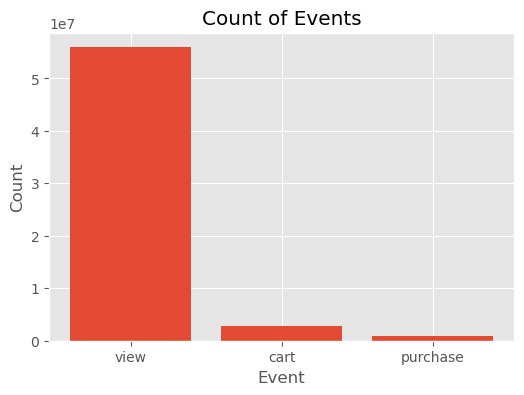

In [29]:
event_counts = df["event_type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(event_counts.index, event_counts.values)
plt.title("Count of Events")
plt.ylabel("Count")
plt.xlabel("Event")
plt.show()

<h4>Category Frequency</h4>
<p>Looking at the top 20 category codes, it can be seen that "construction.tools.light" is the most common. The succeeding top categories are significantly lower. Given the granularity of each category code, dividing the categories into subsets can yield more insights.</p> 

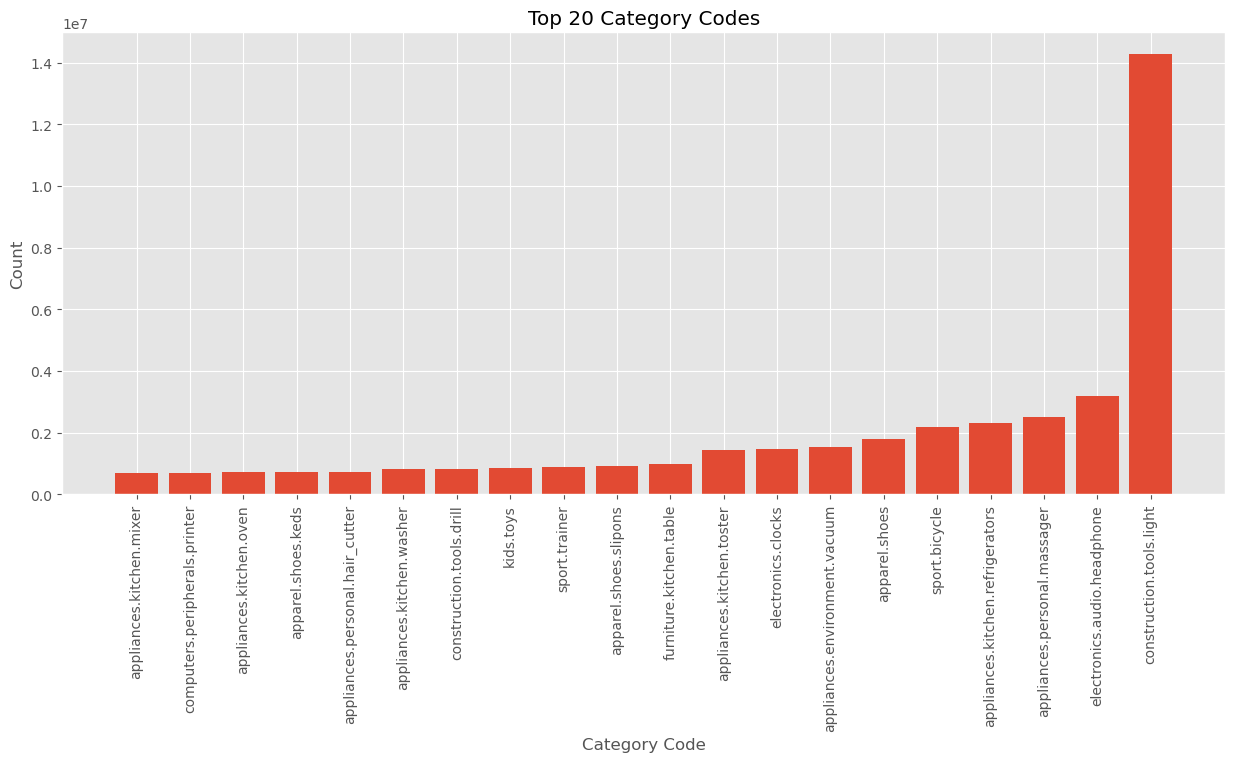

In [30]:
top_20_category_codes = df["category_code"].value_counts().head(20).sort_values(ascending=True)
plt.figure(figsize=(15,6))
plt.bar(top_20_category_codes.index, top_20_category_codes.values)
plt.title("Top 20 Category Codes")
plt.ylabel("Count")
plt.xlabel("Category Code")
plt.xticks(rotation=90)
plt.show()

<p>As shown below, when looking at the highest level categories, the top 4 categories are construction, appliances, apparel, and electronics. These 4 categories are seen extensively in the top 20 category codes.</p>

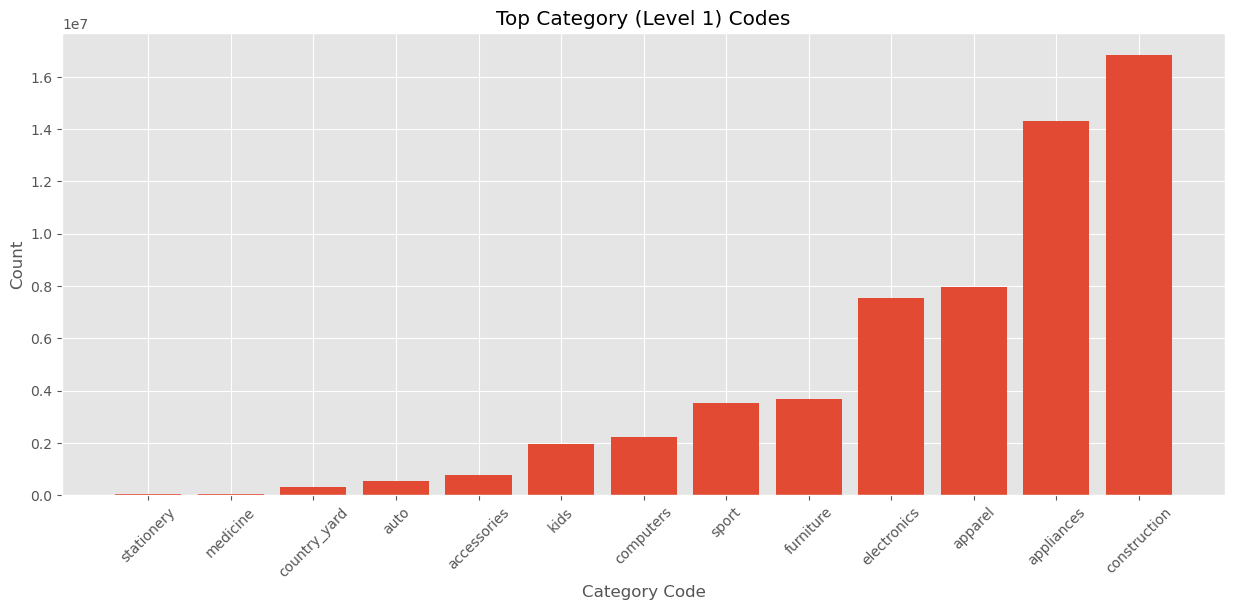

In [31]:
category1_codes = df["category_lvl1"].value_counts().sort_values(ascending=True)
plt.figure(figsize=(15,6))
plt.title("Top Category (Level 1) Codes")
plt.bar(category1_codes.index, category1_codes.values)
plt.ylabel("Count")
plt.xlabel("Category Code")
plt.xticks(rotation=45)
plt.show()

<p>The number of level 2 category codes varies per level 1 category. In general, however, there is a pattern showing a few of the level 2 category codes composing a majority of events for each level 1 category.</p>

In [32]:
# Create a function for easy filtering of category code 1 for visualization
category_df = df[["category_lvl1", "category_lvl2"]]
def cat_filter(cat1_name):
    return category_df[df["category_lvl1"] == cat1_name]["category_lvl2"].value_counts().sort_values(ascending=True)

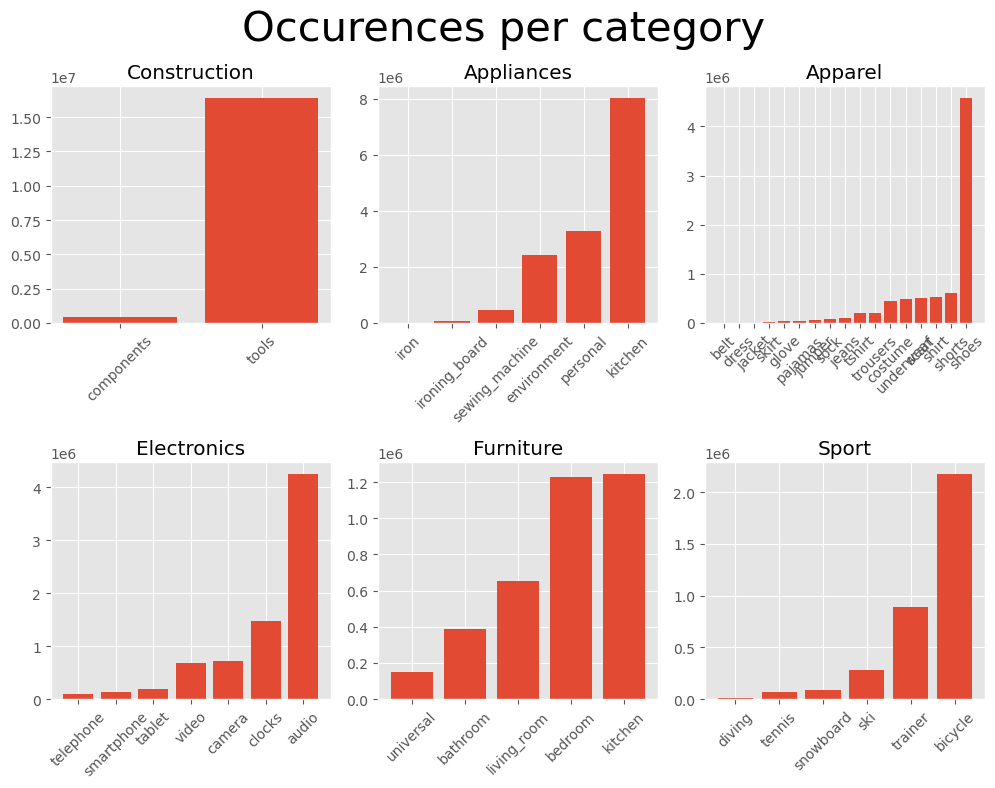

In [33]:
plt.figure(figsize=(10,8))
plt.suptitle("Occurences per category", fontsize=30)

plt.subplot(2,3,1)
plt.title("Construction")
plt.xticks(rotation=45)
plt.bar(cat_filter("construction").index, cat_filter("construction").values)

plt.subplot(2,3,2)
plt.title("Appliances")
plt.xticks(rotation=45)
plt.bar(cat_filter("appliances").index, cat_filter("appliances").values)

plt.subplot(2,3,3)
plt.title("Apparel")
plt.xticks(rotation=45)
plt.bar(cat_filter("apparel").index, cat_filter("apparel").values)

plt.subplot(2,3,4)
plt.title("Electronics")
plt.xticks(rotation=45)
plt.bar(cat_filter("electronics").index, cat_filter("electronics").values)

plt.subplot(2,3,5)
plt.title("Furniture")
plt.xticks(rotation=45)
plt.bar(cat_filter("furniture").index, cat_filter("furniture").values)

plt.subplot(2,3,6)
plt.title("Sport")
plt.xticks(rotation=45)
plt.bar(cat_filter("sport").index, cat_filter("sport").values)

plt.tight_layout()
plt.show()

<h4>Item Price</h4>
<p>We can see that majority of the items have a lower price.</p>

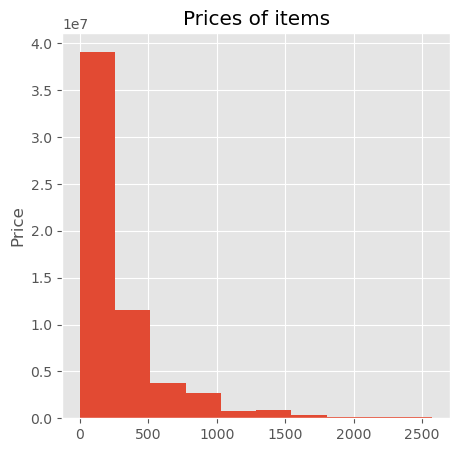

In [34]:
# price
plt.figure(figsize=(5,5))
plt.title("Prices of items")
plt.hist(df["price"], bins=10)
plt.ylabel("Price")
plt.show()

<h4>Multivariate Analysis</h4>
<p>Summary of Findings:</p>
<ul>
    <li>Event occurences per user is right skewed.</li>
    <li>Most categories (level 1) have the same frequency of purchases throughout the month with the exception of a few categories with relative steeper changes.</li>
    <li>The frequency of categories per event type follows roughly the same pattern of frequency all throughout.</li>
</ul>

<h4>Event Distribution</h4>
<p>Events per user is right skewed. The same skewness is also observed when it comes to placing items in a cart and purchasing.</p>

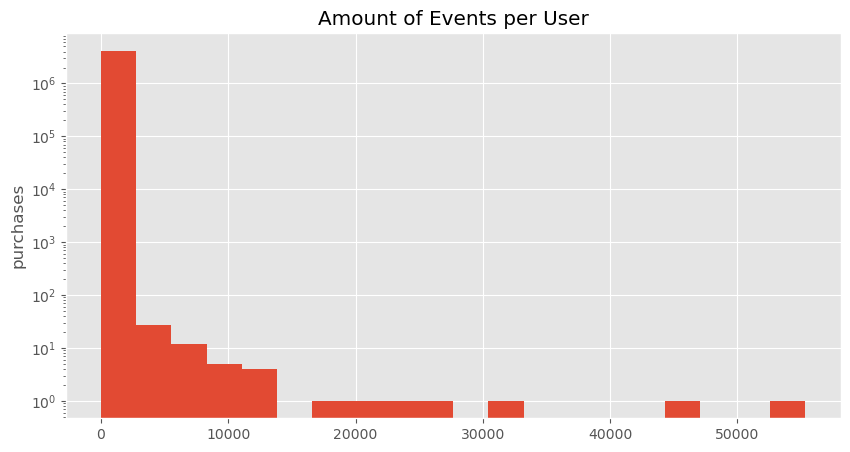

In [35]:
# user_id
user_id_count = df["user_id"].value_counts()
plt.figure(figsize=(10,5))
plt.title("Amount of Events per User")
plt.hist(user_id_count, bins=20)
plt.ylabel("purchases")
plt.yscale("log")
plt.show()

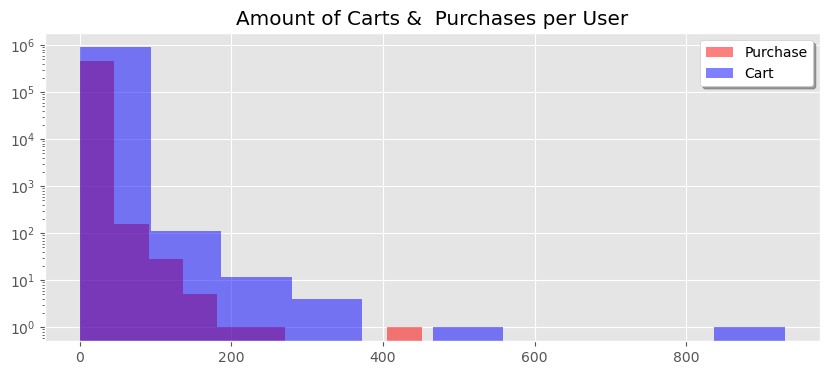

In [36]:
plt.figure(figsize=(10,4))
plt.title("Amount of Carts &  Purchases per User")
plt.hist(df[df["event_type"] == "purchase"]["user_id"].value_counts(), label="Purchase", alpha=0.5, color="red")
plt.hist(df[df["event_type"] == "cart"]["user_id"].value_counts(), label="Cart", alpha=0.5, color="blue")
plt.yscale("log")
plt.legend(loc="upper right", frameon=True, shadow=True, facecolor="white")
plt.show()

<h4>Purchase Activity for each Category</h4>
<p>Most categories have a constant frequency of purchases except for construction, and appliances which have relatively more steep changes.</p>
<p>As shown on the plot, purchases drop steeply on April 20 & 21. Based on a discussion on Kaggle, these drops are likely a result of event tracking errors of shops. Please see this <a href="https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/discussion/230883">link</a> for the discussion:</p>

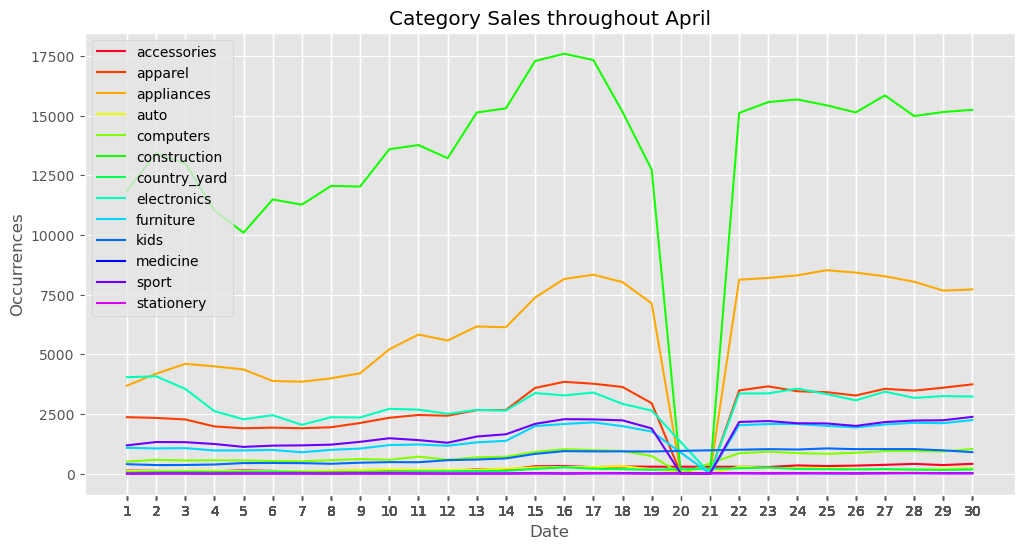

In [37]:
# do users buy certain categories more at different times of the month
cmap = plt.get_cmap('gist_rainbow')
grouped = df[df["event_type"] == "purchase"].groupby(["event_date", "category_lvl1"]).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.title("Category Sales throughout April")
for i, category in enumerate(grouped['category_lvl1'].unique()):
    category_data = grouped[grouped['category_lvl1'] == category]
    plt.plot(category_data['event_date'], category_data['count'], label=category, color=cmap(i/13))
plt.xlabel('Date')
plt.xticks(grouped["event_date"])
plt.ylabel('Occurrences')
plt.legend()
plt.show()

<h4>Frequency of Category Occurences by Event Type</h4>
<p>As shown in the plot below, the frequency of categories per event type follows the same pattern.</p>

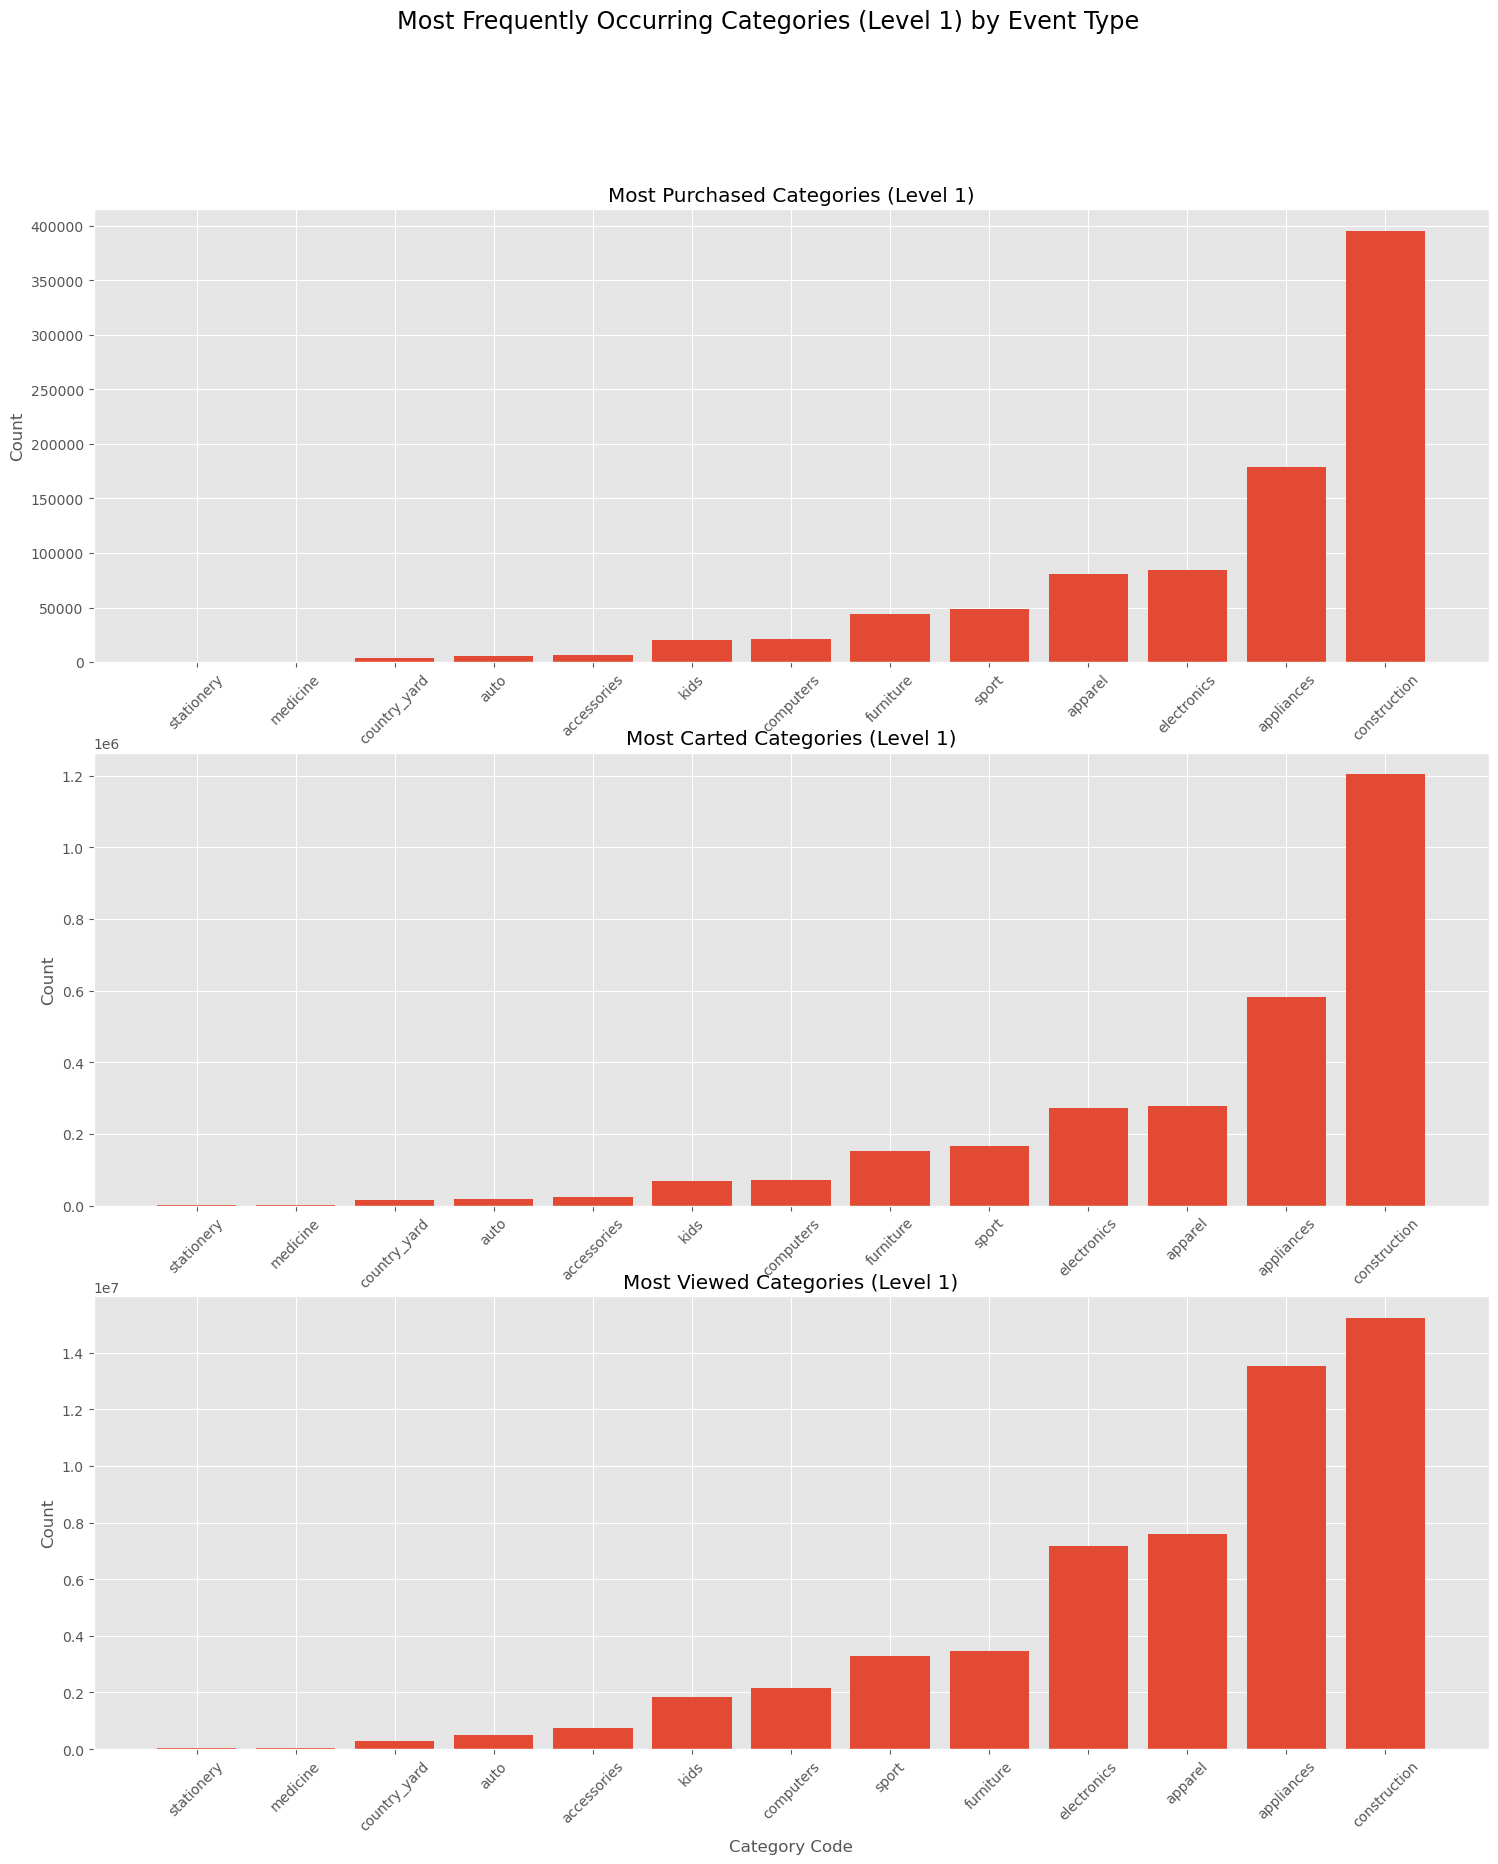

In [41]:
# most popular products by purchase
most_purchased = df[df["event_type"] == "purchase"]["category_lvl1"].value_counts().sort_values(ascending=True)
most_carted = df[df["event_type"] == "cart"]["category_lvl1"].value_counts().sort_values(ascending=True)
most_viewed = df[df["event_type"] == "view"]["category_lvl1"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(18,20))
plt.suptitle("Most Frequently Occurring Categories (Level 1) by Event Type", fontsize="xx-large")
             
plt.subplot(3,1,1) 
plt.title("Most Purchased Categories (Level 1)")
plt.ylabel("Count")
plt.xlabel("Category Code")
plt.xticks(rotation=45)
plt.bar(most_purchased.index, most_purchased.values)

plt.subplot(3,1,2) 
plt.title("Most Carted Categories (Level 1)")
plt.ylabel("Count")
plt.xlabel("Category Code")
plt.xticks(rotation=45)
plt.bar(most_carted.index, most_carted.values)

plt.subplot(3,1,3) 
plt.title("Most Viewed Categories (Level 1)")
plt.ylabel("Count")
plt.xlabel("Category Code")
plt.xticks(rotation=45)
# plt.yscale("log")
plt.bar(most_viewed.index, most_viewed.values)

plt.show()

## Modeling

<h3>3. Content Based Filtering</h3>

<strong>The kernel in EDA was interrupted. The data here will be reimported and reprocessed due. A smaller number of datapoints will be used due to constraints with computational power.</strong>

In [77]:
# import library for computation
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
# Drop uneeded columns
df = pd.read_csv("2020-Apr.csv", usecols=["event_type", 'product_id', 'category_code', 'price', 'brand', 'user_id'], nrows=1e7)
# df = df[["event_type", "product_id", "category_code", "price", "brand", "user_id"]]
df

,event_type,product_id,category_code,brand,price,user_id
0,view,1201465,apparel.shoes.slipons,samsung,230.38,568984877
1,view,1307156,electronics.audio.headphone,apple,1352.67,514955500
2,view,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770
3,view,1307050,electronics.audio.headphone,apple,1724.34,564933778
4,view,9500109,apparel.scarf,defender,25.05,530206135
...,...,...,...,...,...,...
9999995,view,12701961,NaN,cordiant,28.57,634522686
9999996,view,100044127,electronics.video.tv,kenwood,103.48,571895457
9999997,view,2500566,appliances.kitchen.oven,asel,80.27,637799467
9999998,view,32801021,sport.trainer,NaN,174.40,629149981


In [79]:
df_temp = df.copy()

<h4>Data Cleaning</h4>
<p>The data cleaning done in EDA will be repreated as a smaller portion of the dataset will be used. This is due to limited computational power.</p>

In [80]:
type(df_temp)

pandas.core.frame.DataFrame

In [81]:
# typecast columns to other datatypes
df_temp["event_type"] = df_temp["event_type"].astype("category")
df_temp["product_id"] = df_temp["product_id"].astype("int32")
df_temp["category_code"] = df_temp["category_code"].astype("category")
df_temp["brand"] = df_temp["brand"].astype("category")
df_temp["user_id"] = df_temp["user_id"].astype("int32")
df_temp.dtypes

event_type       category
product_id          int32
category_code    category
brand            category
price             float64
user_id             int32
dtype: object

In [83]:
# drop rows with null category codes
df_temp.dropna(subset=["category_code"], inplace=True)

<strong>In this part, we are getting the first part of the category code strings and assigning it into a new column in our temporary dataframe</strong>

In [85]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9047658 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column         Dtype   
---  ------         -----   
 0   event_type     category
 1   product_id     int32   
 2   category_code  category
 3   brand          category
 4   price          float64 
 5   user_id        int32   
dtypes: category(3), float64(1), int32(2)
memory usage: 250.4 MB


In [86]:
# Split the 'category_code' column by '.' and take the first two parts
df_temp['general_category_code'] = df_temp['category_code'].str.split('.').str[0]

In [87]:
# Here is the new general version of the category codes
df_temp['general_category_code'].unique()

array(['apparel', 'electronics', 'appliances', 'construction',
       'computers', 'auto', 'sport', 'medicine', 'furniture', 'kids',
       'accessories', 'country_yard', 'stationery'], dtype=object)

In [88]:
df_temp.head()

,event_type,product_id,category_code,brand,price,user_id,general_category_code
0,view,1201465,apparel.shoes.slipons,samsung,230.38,568984877,apparel
1,view,1307156,electronics.audio.headphone,apple,1352.67,514955500,electronics
2,view,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770,appliances
3,view,1307050,electronics.audio.headphone,apple,1724.34,564933778,electronics
4,view,9500109,apparel.scarf,defender,25.05,530206135,apparel


<strong>Convert general_category_code column into a one hot encoded version and add it as a new column</strong>
<p>There is a reason why the category code was shortened, first is the constraint of RAM storage in our devices. Processing the dataframe with the original category_code values causes the notebook to crash due to large memory requirements. Second</p>

In [89]:
# One-hot encode the 'category_code' column
one_hot = pd.get_dummies(df_temp['general_category_code']).astype(int)

# Join the one hot encoded dataframe df
df_temp = df_temp.join(one_hot)

In [90]:
df_temp.head()

,event_type,product_id,category_code,brand,price,user_id,general_category_code,accessories,apparel,appliances,auto,computers,construction,country_yard,electronics,furniture,kids,medicine,sport,stationery
0,view,1201465,apparel.shoes.slipons,samsung,230.38,568984877,apparel,0,1,0,0,0,0,0,0,0,0,0,0,0
1,view,1307156,electronics.audio.headphone,apple,1352.67,514955500,electronics,0,0,0,0,0,0,0,1,0,0,0,0,0
2,view,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770,appliances,0,0,1,0,0,0,0,0,0,0,0,0,0
3,view,1307050,electronics.audio.headphone,apple,1724.34,564933778,electronics,0,0,0,0,0,0,0,1,0,0,0,0,0
4,view,9500109,apparel.scarf,defender,25.05,530206135,apparel,0,1,0,0,0,0,0,0,0,0,0,0,0


<strong>These are the unique values of the event type column, attributing whether a user has viewed, carted or purchased a product</strong>

In [91]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

<strong>Convert general_category_code column into a one hot encoded version and add it as a new column</strong>
<p>Due to the category_code column features being mutually exclusive, other product features are needed in order to add another factor in content based filtering. One such feature is the event_type of the datapoint.</p>

In [92]:
one_hot = pd.get_dummies(df_temp['event_type']).astype(int)

# Join the one hot encoded dataframe df
df_temp = df_temp.join(one_hot)

In [93]:
df_temp

,event_type,product_id,category_code,brand,price,user_id,general_category_code,accessories,apparel,appliances,...,country_yard,electronics,furniture,kids,medicine,sport,stationery,cart,purchase,view
0,view,1201465,apparel.shoes.slipons,samsung,230.38,568984877,apparel,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,view,1307156,electronics.audio.headphone,apple,1352.67,514955500,electronics,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,view,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770,appliances,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,view,1307050,electronics.audio.headphone,apple,1724.34,564933778,electronics,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,view,9500109,apparel.scarf,defender,25.05,530206135,apparel,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999994,view,1004321,construction.tools.light,huawei,270.27,637798169,construction,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9999996,view,100044127,electronics.video.tv,kenwood,103.48,571895457,electronics,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9999997,view,2500566,appliances.kitchen.oven,asel,80.27,637799467,appliances,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9999998,view,32801021,sport.trainer,NaN,174.40,629149981,sport,0,0,0,...,0,0,0,0,0,1,0,0,0,1


<strong>Slowly dropping any unecessary columns as we transform this dataframe into an item profile matrix</strong>

In [94]:
df_temp.drop('event_type', axis=1, inplace=True)

In [95]:
df_temp.head()

,product_id,category_code,brand,price,user_id,general_category_code,accessories,apparel,appliances,auto,...,country_yard,electronics,furniture,kids,medicine,sport,stationery,cart,purchase,view
0,1201465,apparel.shoes.slipons,samsung,230.38,568984877,apparel,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1307156,electronics.audio.headphone,apple,1352.67,514955500,electronics,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770,appliances,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1307050,electronics.audio.headphone,apple,1724.34,564933778,electronics,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,9500109,apparel.scarf,defender,25.05,530206135,apparel,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df_temp.drop(['category_code' ,'brand', 'general_category_code'], axis=1, inplace=True)

<strong>Filtering products with 0 as price as free items do not make any sense in an online store (without further context)</strong>

In [97]:
df_temp = df_temp[df_temp['price'] != 0.0]

In [98]:
df_temp['price'].min()

0.77

In [99]:
df_temp['price'].max()

2574.07

<strong>Binning the price column values using price ranges in order to turn it into a reasonably sized one hot encoded columns</strong>
<p>This is also another product feature which will be another factor for the similarity score computations</p>

In [100]:
bins = [0, 100, 500, 1000, 2000, 3000]

group_names = ["Very Low", "Low", "Medium", "High", "Very High"]

# Add the binned data as a new column in the DataFrame
df_temp['price_group'] = pd.cut(df_temp['price'], bins, labels=group_names, include_lowest=True)

# One-hot encode the 'price_group' column
one_hot = pd.get_dummies(df_temp['price_group']).astype(int)

# Join the one hot encoded dataframe df
df_temp = df_temp.join(one_hot)

C:\Users\11915110\AppData\Local\Temp\ipykernel_9376\3290226659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['price_group'] = pd.cut(df_temp['price'], bins, labels=group_names, include_lowest=True)


In [101]:
df_temp.head()

,product_id,price,user_id,accessories,apparel,appliances,auto,computers,construction,country_yard,...,stationery,cart,purchase,view,price_group,Very Low,Low,Medium,High,Very High
0,1201465,230.38,568984877,0,1,0,0,0,0,0,...,0,0,0,1,Low,0,1,0,0,0
1,1307156,1352.67,514955500,0,0,0,0,0,0,0,...,0,0,0,1,High,0,0,0,1,0
2,1480477,1184.05,633645770,0,0,1,0,0,0,0,...,0,0,0,1,High,0,0,0,1,0
3,1307050,1724.34,564933778,0,0,0,0,0,0,0,...,0,0,0,1,High,0,0,0,1,0
4,9500109,25.05,530206135,0,1,0,0,0,0,0,...,0,0,0,1,Very Low,1,0,0,0,0


<strong>Further cleaning and dropping of unwanted columns<strong>

In [102]:
df_temp.drop(['price', 'price_group'], axis=1, inplace=True)

In [103]:
df_temp.shape

(9039981, 23)

In [104]:
# Assuming df is your DataFrame
column_list = df_temp.columns.tolist()
print(column_list)

['product_id', 'user_id', 'accessories', 'apparel', 'appliances', 'auto', 'computers', 'construction', 'country_yard', 'electronics', 'furniture', 'kids', 'medicine', 'sport', 'stationery', 'cart', 'purchase', 'view', 'Very Low', 'Low', 'Medium', 'High', 'Very High']


<strongSetting product id as the index of the matrix while the rest remain as columns</strong>
<p>As a final result, we obtain the item profile matrix needed for computing similarity scores of other products.</p>

In [105]:
df_item_profile = df_temp.drop('user_id', axis=1).set_index('product_id')

In [106]:
df_item_profile.head()

,accessories,apparel,appliances,auto,computers,construction,country_yard,electronics,furniture,kids,...,sport,stationery,cart,purchase,view,Very Low,Low,Medium,High,Very High
product_id,,,,,,,,,,,,,,,,,,,,,
1201465,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1307156,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1480477,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1307050,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
9500109,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


<strong>Defining columns to further drop in order to create the user profile matrix</strong>

In [107]:
column_list_to_drop = [ 'accessories', 'apparel', 'appliances', 'auto', 'computers', 'construction', 
               'country_yard', 'electronics', 'furniture', 'kids', 'medicine', 'sport', 'stationery', 
               'Very Low', 'Low', 'Medium', 'High', 'Very High', 'cart', 'purchase', 'view']

In [108]:
df_user_profile = df_temp.drop(column_list_to_drop, axis=1)

<strong>Here we've finally obtained the user profile matrix</strong>

In [109]:
df_user_profile.head()

,product_id,user_id
0,1201465,568984877
1,1307156,514955500
2,1480477,633645770
3,1307050,564933778
4,9500109,530206135


<h4>Computing Similarity Scores</h4>

In [110]:
user_id = 633281427
user_likes = df_user_profile.query(f"user_id=={user_id}")['product_id']

In [111]:
user_likes

10     100077607
38     100177859
52     100177859
130    100177859
247    100177859
298     21400996
304     21400996
365     21400996
461     21400996
Name: product_id, dtype: int32

In [112]:
user_profile = df_item_profile.loc[user_likes].mean(axis=0)
user_profile.head()

accessories    0.000000
apparel        0.000000
appliances     0.041302
auto           0.000000
computers      0.000000
dtype: float64

In [113]:
user_profile.sort_values(ascending=False)

Very Low        0.958698
view            0.927618
electronics     0.830204
construction    0.128494
cart            0.053191
appliances      0.041302
Low             0.041302
purchase        0.019191
accessories     0.000000
stationery      0.000000
High            0.000000
Medium          0.000000
medicine        0.000000
sport           0.000000
apparel         0.000000
kids            0.000000
furniture       0.000000
country_yard    0.000000
computers       0.000000
auto            0.000000
Very High       0.000000
dtype: float64

In [114]:
df_temp = df.copy()

In [115]:
df_temp = df_temp.dropna(subset=['category_code'])
df_temp = df_temp[df_temp['price'] != 0.0]

In [116]:
len(df_item_profile)

9039981

In [117]:
df_scores = df_temp.copy()
scores = cosine_similarity(df_item_profile, user_profile.values.reshape(1,-1)).reshape(-1)
df_scores['similarity'] = scores
df_scores.head(10)

,event_type,product_id,category_code,brand,price,user_id,similarity
0,view,1201465,apparel.shoes.slipons,samsung,230.38,568984877,0.354371
1,view,1307156,electronics.audio.headphone,apple,1352.67,514955500,0.642904
2,view,1480477,appliances.kitchen.refrigerators,apple,1184.05,633645770,0.354371
3,view,1307050,electronics.audio.headphone,apple,1724.34,564933778,0.642904
4,view,9500109,apparel.scarf,defender,25.05,530206135,0.689899
5,view,100068493,construction.tools.light,samsung,319.41,635165435,0.401367
6,view,8901579,computers.desktop,NaN,25.46,527795927,0.689899
7,view,1201295,apparel.shoes.slipons,apple,489.05,635165586,0.354371
8,view,3601036,appliances.kitchen.washer,whirlpool,434.99,610738477,0.369477
9,view,100158887,electronics.clocks,NaN,122.29,601154152,0.658009


<strong>Here we've finally obtained the products not yet purchased by the user with high similarity scores</strong>
As we can see, the other features helped in further aligning similar priced products that are under the same category. The top 10 recommended items consist of electroinics category and very low price range, in which in the user_profile matrix, is the top two highest values.

In [118]:
df_scores_sorted = df_scores.sort_values('similarity', ascending=False)
df_scores_filtered = df_scores_sorted.query(f"product_id not in {user_likes.values.tolist()}")
df_scores_filtered =  df_scores_filtered.drop(['event_type', 'user_id'], axis=1)

In [119]:
df_scores_filtered.head(10).T

,1691042,4935486,3334965,3334967,3334972,2287752,4935557,4935540,628195,9066435
product_id,5100375,24300345,5801482,100081731,8800313,5700842,100132577,8800528,100008037,5800926
category_code,electronics.clocks,electronics.audio.music_tools.piano,electronics.audio.subwoofer,electronics.audio.acoustic,electronics.camera.video,electronics.video.tv,electronics.clocks,electronics.camera.video,electronics.clocks,electronics.audio.subwoofer
brand,xiaomi,NaN,pioneer,adagio,nokia,NaN,axiver,nokia,tobot,NaN
price,84.94,4.23,84.94,97.56,40.93,42.47,78.08,29.58,23.14,46.07
similarity,0.993537,0.993537,0.993537,0.993537,0.993537,0.993537,0.993537,0.993537,0.993537,0.993537


### 4. Item-based Collaborative Filtering

Amazon pioneered Item-based Collaborative Filtering back in 1998. Instead of matching users to similar customers, item-to-item collaborative filtering pairs each user’s purchased and rated items with similar ones (Geek for geeks, 2023). These similar items are then combined to create personalized recommendation lists. As we can see in the data below, the number of unique users are greater than the number of unique products. Item-based collaborative filtering is more stable and faster than the user-based approach when this is the case, especially if ratings are applied to the products, because the ratings of items does not change as quickly over time compared to how users rate different items (Ajitsaria, n.d.). This may also apply to the purchasing behavior of different users, as users' purchasing behaviors may vary quickly through time, but the number of purchases the product revceives do not vary as much quickly in a certain timeframe. Additionally, it outperforms the user-based approach when dealing with sparse ratings matrices.

<strong>The kernel in EDA was interrupted. The data here will be reimported and reprocessed due. A smaller number of datapoints will be used due to constraints with computational power.</strong>

### Import Libraries

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

### Load and read data

In [84]:
df = pd.read_csv('2020-Apr-ecommerce-products.csv', usecols=['event_type', 'product_id', 'category_code', 'price', 'user_id'], nrows=1e7)
df

,event_type,product_id,category_code,price,user_id
0,view,1201465,apparel.shoes.slipons,230.38,568984877
1,view,1307156,electronics.audio.headphone,1352.67,514955500
2,view,1480477,appliances.kitchen.refrigerators,1184.05,633645770
3,view,1307050,electronics.audio.headphone,1724.34,564933778
4,view,9500109,apparel.scarf,25.05,530206135
...,...,...,...,...,...
9999995,view,12701961,NaN,28.57,634522686
9999996,view,100044127,electronics.video.tv,103.48,571895457
9999997,view,2500566,appliances.kitchen.oven,80.27,637799467
9999998,view,32801021,sport.trainer,174.40,629149981


### Dataframe transformation

A better and reliable recommender system is generated from products that were actually purchased rather than the ones that were only viewed (Ghriss, J., 2019). In this case, we filter the dataframe to only purchases.

In [85]:
df["event_type"].value_counts()

view        9284142
cart         544949
purchase     170909
Name: event_type, dtype: int64

In [86]:
df_purchase = df[df["event_type"] == "purchase"]
df_purchase

,event_type,product_id,category_code,price,user_id
130,purchase,100177859,construction.tools.drill,60.49,633281427
347,purchase,1801503,appliances.personal.massager,203.09,629229484
357,purchase,22700202,NaN,171.18,515979190
365,purchase,21400996,electronics.clocks,80.42,633281427
544,purchase,1307058,electronics.audio.headphone,1415.43,513685353
...,...,...,...,...,...
9999764,purchase,8700621,appliances.personal.hair_cutter,56.60,513624312
9999793,purchase,2600803,NaN,263.07,607147591
9999858,purchase,100068496,construction.tools.light,320.47,637798032
9999974,purchase,12700185,NaN,43.76,530742661


In [87]:
df_purchase = df_purchase.dropna()
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159130 entries, 130 to 9999977
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_type     159130 non-null  object 
 1   product_id     159130 non-null  int64  
 2   category_code  159130 non-null  object 
 3   price          159130 non-null  float64
 4   user_id        159130 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.3+ MB


In [88]:
print("Number of Purchases per Category:\n")
print(df_purchase['category_code'].value_counts())
print("\nNumber of Unique Categories:", df_purchase['category_code'].nunique())

Number of Purchases per Category:

construction.tools.light            72788
electronics.audio.headphone         13429
appliances.personal.massager         7579
sport.bicycle                        6347
appliances.kitchen.refrigerators     4066
                                    ...  
computers.peripherals.keyboard          1
auto.accessories.player                 1
country_yard.furniture.bench            1
appliances.kitchen.steam_cooker         1
apparel.skirt                           1
Name: category_code, Length: 126, dtype: int64

Number of Unique Categories: 126


In [89]:
print("Number of Users:", df_purchase['user_id'].nunique())
print("\nNumber of Products:", df_purchase['product_id'].nunique())

Number of Users: 96521

Number of Products: 16546


### Grouping user-product purchase count

The number of purchases was set to greater than 1 to to have a data of products that were bought more thance once. This is also done to reduce the number of rows of the dataframe, since a the size of the original dataframe is too large to be able to create a pivot table for the buyer-product matrix.

In [90]:
agg_purchases = df_purchase.groupby(['product_id', 'user_id', 'category_code'])\
                    .agg(purchase_count = ('event_type', 'count')).reset_index()\
                    .sort_values(by="purchase_count", ascending=False)
agg_purchases = agg_purchases[agg_purchases['purchase_count'] > 1]
agg_purchases

,product_id,user_id,category_code,purchase_count
70845,4804056,577802046,sport.bicycle,50
37832,1005211,554409397,construction.tools.light,47
100063,100008550,635616701,appliances.kitchen.refrigerators,42
34553,1005160,603865034,construction.tools.light,38
47379,1307050,555546931,electronics.audio.headphone,38
...,...,...,...,...
118747,100104755,540364517,electronics.audio.headphone,2
118818,100104755,570171791,electronics.audio.headphone,2
15162,1004839,625659526,construction.tools.light,2
116477,100086203,626113814,construction.tools.light,2


#### The number of different products each customer have purchased

In [91]:
agg_purchases['user_id'].value_counts().head(10)

628167977    53
594843325    15
608185516    13
550036025    13
598224683    12
592387349    11
592215317    11
636277115    11
613640444    10
628214185     9
Name: user_id, dtype: int64

#### The number of different customers that bought each product


In [92]:
agg_purchases['product_id'].value_counts().head(10)

1005100      867
1005212      623
100068488    553
1004836      387
1002544      300
100068493    294
4804056      269
1005160      266
1004856      254
1005115      238
Name: product_id, dtype: int64

### Buyer-Product Matrix

In [93]:
buyer_product_matrix = agg_purchases.pivot_table(index="product_id", columns="user_id", values="purchase_count")
buyer_product_matrix

user_id,300613484,471150399,499295685,505479384,506168394,512360471,512363997,512364215,512364591,512364614,...,637779315,637779558,637780478,637781051,637783289,637787910,637788592,637790188,637793846,637797548
product_id,,,,,,,,,,,,,,,,,,,,,
1002098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100189341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100189486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100190575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing - Mean Imputation

In [94]:
buyer_product_matrix_filled = buyer_product_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)
buyer_product_matrix_filled

user_id,300613484,471150399,499295685,505479384,506168394,512360471,512363997,512364215,512364591,512364614,...,637779315,637779558,637780478,637781051,637783289,637787910,637788592,637790188,637793846,637797548
product_id,,,,,,,,,,,,,,,,,,,,,
1002098,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1002524,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,...,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458,2.847458
1002525,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,...,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000,2.800000
1002528,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1002531,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,...,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636,2.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100189341,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
100189486,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
100190575,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


#### Chosen user and product

In [95]:
user_id = 628167977
product_id = 1005100

#### Products purchased by user `628167977`

In [96]:
user_purchased = pd.DataFrame(buyer_product_matrix[user_id].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={user_id:'count_purchases'}).head(10)
user_purchased

,product_id,count_purchases
0,1005099,22.0
1,1004858,19.0
2,1004838,18.0
3,1004961,14.0
4,1005168,11.0
5,1005100,11.0
6,100011103,11.0
7,1802061,8.0
8,1004836,8.0
9,1005211,7.0


### Computing similarity of purchased products by user `628167977` to the purchased product basis

In [ ]:
product_basis = buyer_product_matrix_filled.loc[product_id]
product_basis_similarity = buyer_product_matrix_filled.apply(lambda x: pearsonr(x, product_basis)[0], axis=1)\
                           .reset_index().rename(columns={0:'similarity_score'})

In [105]:
user_purchased_similarity = pd.merge(left=user_purchased, 
                                            right=product_basis_similarity, 
                                            on='product_id', 
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False).nlargest(10, 'similarity_score')
 
user_purchased_similarity = user_purchased_similarity[user_purchased_similarity.product_id != product_id]
user_purchased_similarity

,product_id,count_purchases,similarity_score
0,1005099,22.0,0.195564
3,1004961,14.0,0.189426
1,1004858,19.0,0.184351
4,1005168,11.0,0.181377
7,1802061,8.0,0.162789
2,1004838,18.0,0.150760
6,100011103,11.0,0.126306
8,1004836,8.0,0.043522
9,1005211,7.0,0.009924


#### Products not purchased products by user `628167977`

In [106]:
user_not_purchased = pd.DataFrame(buyer_product_matrix[user_id].isna())\
                          .reset_index()\
                          .rename(columns={628167977:'not_purchased'})
user_not_purchased = user_not_purchased[user_not_purchased.not_purchased != False]
user_not_purchased

,product_id,not_purchased
0,1002098,True
1,1002524,True
2,1002525,True
3,1002528,True
4,1002531,True
...,...,...
4015,100189341,True
4016,100189486,True
4017,100190575,True
4018,100191188,True


### Computing similarity of  products that are not purchased by user `628167977` to the purchased product basis

In [107]:
user_not_purchased_similarity = pd.merge(left=user_not_purchased, 
                                            right=product_basis_similarity, 
                                            on='product_id', 
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False).nlargest(10, 'similarity_score')
user_not_purchased_similarity

,product_id,not_purchased,similarity_score
1553,5701406,True,0.089609
165,1004990,True,0.076447
965,3600036,True,0.054504
114,1004767,True,0.049807
3580,100107798,True,0.046261
267,1005259,True,0.045365
103,1004723,True,0.043400
3867,100170834,True,0.043196
724,2502060,True,0.027226
253,1005212,True,0.024898


In [112]:
agg_purchases_indiv = df_purchase.groupby('product_id')\
                    .agg(purchase_count = ('event_type', 'count')).reset_index()\
                    .sort_values(by="purchase_count", ascending=False)

product_ids_to_check = [2900561, 3900774, 1004566, 1005267, 100051525]  # Example list of product IDs to check

agg_purchases_indiv = agg_purchases_indiv[agg_purchases_indiv['product_id'].isin(product_ids_to_check)]
agg_purchases_indiv

,product_id,purchase_count
177,1004566,188
493,1005267,97
1924,2900561,90
2837,3900774,32
12833,100051525,25


### Computing the weighted average number of purchases for purchased products

In [101]:
weighted_purchases = round(np.average(user_purchased_similarity['count_purchases'], 
                                    weights=user_purchased_similarity['similarity_score']), 4)

print(f'The weighted average number of purchases for product {product_id} by user {user_id} is {weighted_purchases}' )

The weighted average number of purchases for product 1005100 by user 628167977 is 14.6904


### Item-Based Collaborative Filtering Recommender System (semi-automated)

An input of user_id number would automatically generate recommended products based on the weighted average of number of purchases.

In [ ]:
import operator


user_id = 628167977

user_not_purchased = pd.DataFrame(buyer_product_matrix[user_id].isna())\
                          .reset_index()\
                          .rename(columns={user_id:'not_purchased'})
user_not_purchased = user_not_purchased[user_not_purchased.not_purchased != False]
user_not_purchased_list = user_not_purchased['product_id'].values.tolist()

user_purchased = pd.DataFrame(buyer_product_matrix[user_id].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={user_id:'count_purchases'})

# storing not purchased products and their weighted average number of purchases
weighted_ave_purchases_dict = {}
i = 0

for not_purchased in user_not_purchased_list:
    i += 1
    print(i)
    
    product_basis = buyer_product_matrix_filled.loc[not_purchased]
    # Calculate similarity of unpurchased product to other products
    product_basis_similarity = buyer_product_matrix_filled.apply(lambda x: pearsonr(x, product_basis)[0], axis=1)\
                           .reset_index().rename(columns={0:'similarity_score'}).nlargest(5, 'similarity_score')
    product_basis_similarity = product_basis_similarity[product_basis_similarity['similarity_score'] != 0]

    if not product_basis_similarity.empty:
        # Using the similarity of unpurchased product to other products, match this similarity with the purchased products
        user_not_purchased_similarity = pd.merge(left=user_purchased, 
                                                right=product_basis_similarity, 
                                                on='product_id', 
                                                how='inner')\
                                         .sort_values('similarity_score', ascending=False).nlargest(10, 'similarity_score')
        # Using the weighted average number of purchases, suggest the most popular, similar, and unpurchased item to user
        if not user_not_purchased_similarity.empty:
            weighted_ave_purchase = round(np.average(user_not_purchased_similarity['count_purchases'],
                                                     weights=user_not_purchased_similarity['similarity_score']), 4)
            weighted_ave_purchases_dict[not_purchased] = weighted_ave_purchase


top_weighted_ave_purchases = sorted(weighted_ave_purchases_dict.items(), key=operator.itemgetter(1), reverse=True)[:5]


### Recommended most popular, similar, and unpurchased item to user

In [60]:
top_weighted_ave_purchases 

[(2900561, 19.0),
 (3900774, 19.0),
 (1004566, 18.0),
 (1005267, 18.0),
 (100051525, 18.0)]

The top 5 recommended products for user_id `628167977` are products: `2900561`, `3900774`, `1004566`, `1005267`, and `100051525`, having a weighted average number of purchases `18.0` & `19.0`

## 5. Conclusion

The group was able to successfully create a hybrid ecommerce product recommender system that utilizes implicit content-based filtering and item-based collaborative filtering. The recommender system has addressed and solved the the cold start problem and the sparsity in interaction data between customers and products in new ecommerce stores. In doing so, unexplored products of specific users are recommended, thus maximizing the presence of different products in the platform. Because new items are always getting recommeneded to users, this would imply growth in sales and improvement in customer retention.

Since the purchasing behavior of customers was the basis of the item-based collaborative filtering in this project, it is recommended for future projects to explore different event types such as view and add-to-cart as the aggregated count values in the user-product matrix. Furthermore, machine learning techniques are recommended to be used to gauge the performance and robustness of the recommender system.

## 6. References

-Ajitsaria, A. (n.d.). Build a recommendation engine with collaborative filtering. https://realpython.com/build-recommendation-engine-collaborative-filtering/#:~:text=In%20a%20system%20where%20there,a%20user%20to%20different%20items. <br>
-Geeks for geeks. (2023). Item-to-Item based collaborative filtering.  https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/ <br>
-Pan, T. (2018). Part 1 - Applied machine learning: Recommender system for e-commerce. https://www.linkedin.com/pulse/part-1-applied-ml-recommender-system-e-commerce-tianyi-pan/ <br>
-Richter, W. (2018). Here's which brick-and-mortar retailers are getting hit the hardest. https://www.businessinsider.com/brick-and-mortar-retailers-getting-hit-the-hardest-2018-5?IR=T